<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-luisnegronnaldos/blob/main/Acitividad_Semana6_A01793865.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Luis Alfredo Negron Naldos

Matricula: A01793865

Curso: Ciencias y Analítica de Datos

In [1]:
import requests
import zipfile
import io
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# 1. Descargar los datos 

In [4]:
url = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
df = pd.read_csv(url, sep=',')
df.head()


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# 2. Descripción de los Datos 


**X1**: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).

**X2**: Género (1 = masculino; 2 = femenino).

**X3**: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).

**X4**: Estado civil (1 = casado; 2 = soltero; 3 = otros).

**X5**: Edad (año).

**X6 - X11**: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera: X6 = el estado de pago en septiembre de 2005; X7 = el estado de pago en agosto de 2005; . . .;X11 = estado de amortización en abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.

**X12-X17:** Importe del estado de cuenta (dólar NT). X12 = monto del estado de cuenta en septiembre de 2005; X13 = monto del estado de cuenta en agosto de 2005; . . .; X17 = monto del estado de cuenta en abril de 2005.

**X18-X23:** Monto del pago anterior (dólar NT). X18 = monto pagado en septiembre de 2005; X19 = monto pagado en agosto de 2005; . . .;X23 = monto pagado en abril de 2005.


**Información sobre la fuente de los datos** 

Relevant Papers:
Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

Citation Request:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.
**

Relevant Papers:
Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

Citation Request:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.


In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().any()
#Nos indica que muchas de las columnas tienen datos faltantes 

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [7]:
df.info()
#Nos permite ver la información de la base de datos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [9]:
df.shape
#Como se puede observar es una base de datos de 30000 filas y 25 columnas. 

(30000, 25)

# 3.Registros Nulos

In [ ]:
df.dropna(inplace = True)
# con esta opción se elimina los datos faltantes. 

In [11]:
df.isnull().values.any()
#Aqui verificamos que la base de datos a quedado sin datos faltantes. 

False

In [12]:
df.isnull().any()
#Como se muestra ya no hay datos nulos 

ID     False
X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

In [13]:
df
# Al correr nuevamente la vista de "df" vemos que ahora tiene 29958 filas vs las 30000 filas iniciales. Esto se debe por las filas que se han eliminado con datos faltantes


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [22]:
ndf=df.rename(columns={'X1':'MontCred','X2':'Gen','X3':'Edu','X4':'StaMar','X5':'Edad','X6':'MPSep','X7':'MPAg','X8':'MPJul','X9':'MPJun','X10':'MPMay','X11':'MPAbr', 'X12':'BSSep', 'X13':'BSAg', 'X14':'BSJul','X15':'BSJun','X16':'BSMay','X17':'BSAbr','X18':'PPSep','X19':'PPAg','X20':'PPJul','X21':'PPJun','X22':'PPMay','X23':'PPAbr'})

In [24]:
ndf.head()

,ID,MontCred,Gen,Edu,StaMar,Edad,MPSep,MPAg,MPJul,MPJun,...,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# 4. Estadística Descriptiva

In [23]:
ndf.describe()
#Aqui describo los datos actuales para ver como queda eliminando los datos faltantes... antes de generar reemplazos con la media. 

,ID,MontCred,Gen,Edu,StaMar,Edad,MPSep,MPAg,MPJul,MPJun,...,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [34]:
ndf.loc[:,"Gen":"MPAbr"].mode()

,Gen,Edu,StaMar,Edad,MPSep,MPAg,MPJul,MPJun,MPMay,MPAbr
0,2.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0


Para este grupo de datos la medida de tendencia central (media), nos indica el valor que representa el promedio de los datos en el caso de las variables numéricas, pero en el cao de las variables como la Genero, educación y Estado civil en ese caso se debe considear la moda com media de tendencia central debemos considerar el valor de la moda no el de la media.

En el caso de la dispersión los datos nos muestran dos indicadores:
- Desviación estandar que es la media de dispersión respecto a la media 
- Los quartiles (min, 25%, 50%(mediana), 75% y max). Esto solo aplica para los valores numéricos del caso, no aplica para los valores categóricos 

# Variables Categóricas 

1.   Elemento de la lista
2.   Elemento de la lista



In [40]:
ndf.columns

Index(['ID', 'MontCred', 'Gen', 'Edu', 'StaMar', 'Edad', 'MPSep', 'MPAg',
       'MPJul', 'MPJun', 'MPMay', 'MPAbr', 'BSSep', 'BSAg', 'BSJul', 'BSJun',
       'BSMay', 'BSAbr', 'PPSep', 'PPAg', 'PPJul', 'PPJun', 'PPMay', 'PPAbr',
       'Y'],
      dtype='object')

In [44]:
# Se crea una base de datos de variables categóricas 
categ=['Gen', 'Edu', 'StaMar', 'MPSep', 'MPAg',
       'MPJul', 'MPJun', 'MPMay', 'MPAbr']
categoricos=ndf[categ]
categoricos.head()

,Gen,Edu,StaMar,MPSep,MPAg,MPJul,MPJun,MPMay,MPAbr
0,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0
1,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0
2,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0


In [50]:
pd.value_counts(categoricos["Gen"])

2.0    18095
1.0    11863
Name: Gen, dtype: int64

In [49]:
pd.value_counts(categoricos["Edu"])

2.0    14009
1.0    10572
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: Edu, dtype: int64

In [51]:
pd.value_counts(categoricos["MPSep"])

 0.0    14717
-1.0     5680
 1.0     3678
-2.0     2758
 2.0     2662
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: MPSep, dtype: int64

In [53]:
pd.value_counts(categoricos["MPAg"])

 0.0    15709
-1.0     6042
 2.0     3918
-2.0     3778
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: MPAg, dtype: int64

In [54]:
pd.value_counts(categoricos["MPJul"])

 0.0    15742
-1.0     5930
-2.0     4082
 2.0     3811
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: MPJul, dtype: int64

In [57]:
pd.value_counts(categoricos["MPJun"])

 0.0    16431
-1.0     5681
-2.0     4343
 2.0     3154
 3.0      179
 4.0       69
 7.0       57
 5.0       35
 6.0        5
 1.0        2
 8.0        2
Name: MPJun, dtype: int64

In [59]:
pd.value_counts(categoricos["MPMay"])

 0.0    16925
-1.0     5533
-2.0     4541
 2.0     2618
 3.0      178
 4.0       84
 7.0       57
 5.0       17
 6.0        4
 8.0        1
Name: MPMay, dtype: int64

In [60]:
pd.value_counts(categoricos["MPAbr"])

 0.0    16266
-1.0     5731
-2.0     4890
 2.0     2760
 3.0      183
 4.0       49
 7.0       46
 6.0       18
 5.0       13
 8.0        2
Name: MPAbr, dtype: int64

# Escalada de Datos

In [62]:
num=['MontCred', 'BSSep', 'BSAg', 'BSJul', 'BSJun',
       'BSMay', 'BSAbr', 'PPSep', 'PPAg', 'PPJul', 'PPJun', 'PPMay', 'PPAbr'
       ]       
numericos=ndf[num]
numericos.head()

,MontCred,BSSep,BSAg,BSJul,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr
0,20000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [64]:
#escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(numericos)
scaled

array([[-1.13736269, -0.64249667, -0.64735943, ..., -0.30810735,
        -0.31412418, -0.29348473],
       [-0.36656147, -0.65920548, -0.66669659, ..., -0.24431534,
        -0.31412418, -0.18105373],
       [-0.59780183, -0.29873773, -0.49394006, ..., -0.24431534,
        -0.24870184, -0.01240721],
       ...,
       [-1.06028257, -0.6472202 , -0.64379252, ..., -0.0401809 ,
        -0.18327949, -0.11921667],
       [-0.67488196, -0.71793741,  0.40975268, ..., -0.18524394,
         3.15090487, -0.19207196],
       [-0.90612232, -0.04505161, -0.00414961, ..., -0.24431534,
        -0.24870184, -0.23726923]])

In [65]:
scaled_num = pd.DataFrame(scaled, columns=numericos.columns)
scaled_num.head()

,MontCred,BSSep,BSAg,BSJul,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr
0,-1.137363,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


# PCA

In [66]:
from sklearn.decomposition import PCA
pcs = PCA()
pcs_t = pcs.fit_transform(scaled_num)
pcs_t[:5]

array([[-1.91808952e+00, -4.47504565e-01,  3.72798906e-01,
        -3.91569322e-02,  1.01868407e-01, -1.85385203e-01,
         5.99938947e-01, -2.34273812e-02,  1.10205572e-02,
         1.70189018e-02, -4.62474420e-03,  8.29817512e-03,
         1.10109508e-02],
       [-1.70250886e+00, -1.48080704e-01,  5.27250281e-02,
         1.39736613e-02, -4.93512178e-02,  1.49057113e-02,
         5.50706959e-02,  9.35382503e-02, -8.17497393e-02,
        -5.44367077e-03,  1.09240395e-02, -3.91941083e-03,
         1.77691185e-03],
       [-1.21960637e+00, -2.74838066e-01,  8.97271849e-02,
         1.17817395e-01, -3.53389435e-02, -8.57141847e-02,
         3.36877465e-01,  2.54000511e-02, -1.64524270e-02,
         1.12410976e-01, -8.05425000e-02, -4.13421828e-02,
        -5.70492231e-02],
       [-5.46563974e-01, -6.76178432e-01,  3.56169907e-01,
         8.15677234e-03,  1.08504631e-01, -2.07612542e-01,
         5.07752904e-01, -4.01303200e-02,  1.47076673e-01,
         1.68109254e-03,  1.38445837e

In [67]:
pcsSummary_ncdf2 = pd.DataFrame({
'% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
})
pcsSummary_ncdf2

,% varianza explicada,% varianza acumulada
0,45.49,45.489337
1,13.17,58.658945
2,7.25,65.906564
3,6.80,72.706429
4,6.72,79.426559
5,6.02,85.444591
6,5.70,91.142363
7,5.59,96.729601
8,2.03,98.764218
9,0.55,99.310401


In [69]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_num.columns))]
pcsSummary_ncdf2.index = pcs_labels
pcsSummary_ncdf2

,% varianza explicada,% varianza acumulada
PC1,45.49,45.489337
PC2,13.17,58.658945
PC3,7.25,65.906564
PC4,6.80,72.706429
PC5,6.72,79.426559
PC6,6.02,85.444591
PC7,5.70,91.142363
PC8,5.59,96.729601
PC9,2.03,98.764218
PC10,0.55,99.310401


**- Como se puede ver en este caso los primeros 4 componentes explican el 72% de la variación**

In [71]:
total_var =scaled_num.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (scaled_num.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (scaled_num.var().cumsum() / total_var) *100})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
MontCred,7.692308,7.692308
BSSep,7.692308,15.384615
BSAg,7.692308,23.076923
BSJul,7.692308,30.769231
BSJun,7.692308,38.461538
BSMay,7.692308,46.153846
BSAbr,7.692308,53.846154
PPSep,7.692308,61.538462
PPAg,7.692308,69.230769
PPJul,7.692308,76.923077


In [75]:
pcs_ncdf2 = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", scaled_num.var().sum())
print("Varianza total de los componentes: ", pcs_ncdf2.var().sum())

Varianza total variables originales:  13.000433955335978
Varianza total de los componentes:  13.000433955335971


In [77]:
#Importancia de Cada variable en el Componente.
comps_ncdf2 = pd.DataFrame(
pcs.components_.round(4), # pesos de cada componente
columns = pcs_ncdf2.columns, #Son 13 columnas
index = scaled_num.columns) # 13 filas variables originales


comps_ncdf2.iloc[:,:4] 

,PC1,PC2,PC3,PC4
MontCred,0.1648,0.3727,0.3835,0.3885
BSSep,0.2940,-0.1907,-0.1741,-0.1258
BSAg,-0.3929,-0.0744,0.0037,0.0725
BSJul,0.0512,0.0408,0.0843,0.1110
BSJun,-0.1044,-0.0387,-0.0250,0.1023
BSMay,0.2559,0.0032,-0.0332,-0.1154
BSAbr,-0.8003,0.0178,-0.0128,-0.0258
PPSep,0.1061,0.0067,-0.1361,0.0969
PPAg,-0.0312,0.5667,0.3869,0.1229
PPJul,-0.0062,0.4160,0.0384,-0.4848


# VIsualización, Intrepretación y Explicación de Datos

In [79]:
numericos.head()

,MontCred,BSSep,BSAg,BSJul,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr
0,20000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


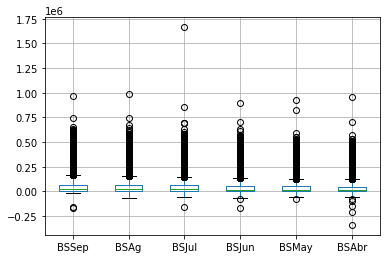

In [82]:
numericos.boxplot(column= ['BSSep',	'BSAg',	'BSJul',	'BSJun',	'BSMay',	'BSAbr'])

En este gráfico se puede puede ver los diferentes saldos de cuenta de los meses de Abril a Septiembre, como se puede observar la presentacia de valores atípico para todos los meses es un elemento que puede influir en el desarrollo de un modelo posterior. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b5525e6d0>,
      dtype=object)

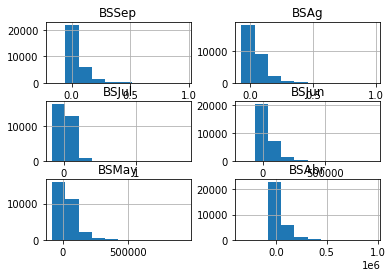

In [83]:
numericos.hist(column= ['BSSep',	'BSAg',	'BSJul',	'BSJun',	'BSMay',	'BSAbr'])

Si lo vemos por medio del histograma podemos ver que presentan un sesgo a la derecha para todos los meses esto puede implicar que en un modelo de predicción puede que sea mejor generar una escala ordinal en función del saldo deudor de la tarjeta para que ayude a generar un modelo 

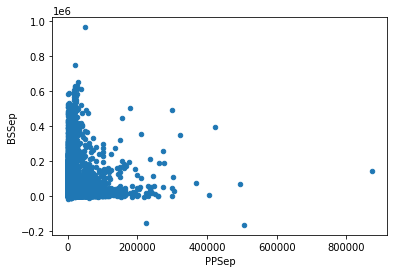

In [87]:
import matplotlib.pyplot as plt
my_plot = numericos.plot("PPSep","BSSep", kind="scatter")
plt.show()

En este gráfico se evaluo si existe una relación entre el pago del mes de Septiembre("PPSep") y la su saldo en el estado de cuenta del mismo mes ("BSSep"), no se encontro una relación significativa, para mejorar el análisis se realiza un mapa de correlaciones. 


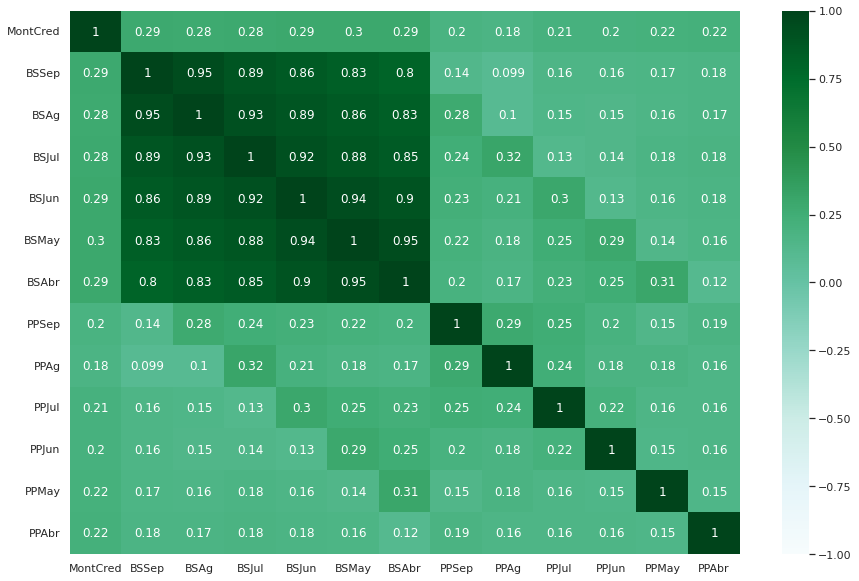

In [88]:
import seaborn as sns
corrs = numericos.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

En este caso lo que si se observa es una importante correlación entre las variables de estados de cuenta de cada cliente, se va a realizar un diagrama de dispersión para entender esta relación


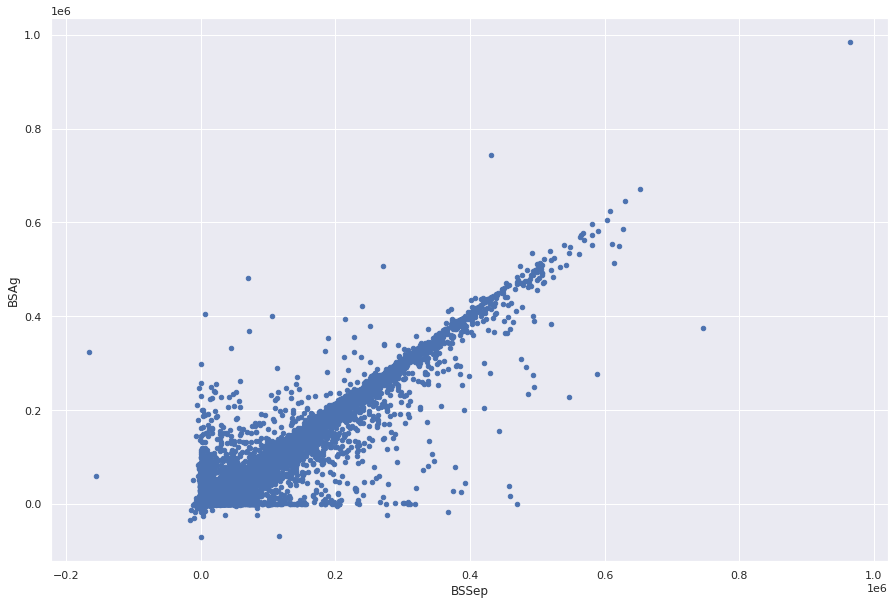

In [90]:
import matplotlib.pyplot as plt
my_plot = numericos.plot("BSSep","BSAg" ,kind="scatter")
plt.show()

En este gráfico se puede ver que existe una importante correlación positiva entre los saldos deudores de dos meses consecutivos. 